# Beer assignment 

## Data: https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz

Answer the following questions using the data above. 
1) Which brewery produces the strongest beers by ABV%?
2) If you had to pick 3 beers to recommend using only the data in this dataset, which would you pick?
3) Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
4) Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

Show your work. I want to clearly understand your thought process for this assignment. You may work in teams of two if you wish.

In [4]:
## Downliading into DF

import pandas as pd
import numpy as np

"data from: https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz"

import os
os.chdir('/Users/eran/Gal_tyuta/Beer_reviews')
df=pd.read_csv('beer_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [5]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

### Some Data exploration

In [7]:
#let's drop na first
df.dropna(inplace=True)

In [8]:
## very useful but not neccesary for ex:
## to get the counts of beers id's for every brewery
df.groupby('brewery_name')['beer_beerid'].value_counts()[0:10]

brewery_name           beer_beerid
't Hofbrouwerijke      33506          16
                       28810           9
                       33518           7
                       64095           2
                       28825           1
                       49512           1
                       69815           1
(512) Brewing Company  45617          81
                       43535          54
                       54905          37
Name: beer_beerid, dtype: int64

### Which brewery produces the strongest beers (abv)?

In [9]:
### use grouby to aggregate data in an informative way:
### the same like at the top but with added abv info on each beer
df.groupby(['brewery_name','beer_beerid'])['beer_abv'].value_counts()[0:10]

brewery_name           beer_beerid  beer_abv
't Hofbrouwerijke      28810        8.5          9
                       28825        6.2          1
                       33506        5.5         16
                       33518        6.5          7
                       49512        5.0          1
                       64095        11.0         2
                       69815        8.0          1
(512) Brewing Company  43534        5.5         14
                       43535        7.0         54
                       43536        5.5         18
Name: beer_abv, dtype: int64

In [10]:
## now let's try and get the mean of abv for each brewery:
## first, for each brewery get the unique beer id and its abv
by=df.groupby(['brewery_name','beer_beerid']).agg({'beer_abv':'mean'})
by.head(10)

beer_abv
brewery_name          beer_beerid          
't Hofbrouwerijke     28810             8.5
                      28825             6.2
                      33506             5.5
                      33518             6.5
                      49512             5.0
                      64095            11.0
                      69815             8.0
(512) Brewing Company 43534             5.5
                      43535             7.0
                      43536             5.5

In [11]:
### now take that "by" df and do mean on the abv 
brewabv=by.groupby('brewery_name')[['beer_abv']].mean() ## using double brackets to turn it into a 
## df rather than keep it as series 
brewabv.head(10)

,beer_abv
brewery_name,
't Hofbrouwerijke,7.242857
(512) Brewing Company,7.238462
10 Barrel Brewing Co.,6.109091
1516 Brewing Company,5.650000
16 Mile Brewing Company,5.716667
1648 Brewing Company Ltd,3.700000
1702 / The Address Brewing Co.,6.800000
192 Brewing Company,6.000000
2 Brothers Brewery,6.266667


In [12]:
## sorting the values from highest to lowest
brewabv=brewabv.sort_values('beer_abv',ascending=False)
brewabv.head(10)

,beer_abv
brewery_name,
Schorschbräu,24.690000
Shoes Brewery,15.200000
Rome Brewing Company,14.200000
Hurlimann Brewery,13.500000
Alt-Oberurseler Brauhaus,13.200000
Rascal Creek Brewing Co.,13.000000
Monks Porter House,12.466667
Rinkuki&#371; Aluas Darykla,12.000000
United Brands Company,12.000000


In [13]:
## turnning that groupby df into normal df so we can work on the cols and visualize
brewabv.reset_index(inplace=True)
brewabv.head(10)

,brewery_name,beer_abv
0,Schorschbräu,24.690000
1,Shoes Brewery,15.200000
2,Rome Brewing Company,14.200000
3,Hurlimann Brewery,13.500000
4,Alt-Oberurseler Brauhaus,13.200000
5,Rascal Creek Brewing Co.,13.000000
6,Monks Porter House,12.466667
7,Rinkuki&#371; Aluas Darykla,12.000000
8,United Brands Company,12.000000
9,Snowy Mountain Brewery,12.000000


In [14]:
## let's visualize this:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

KeyboardInterrupt: 

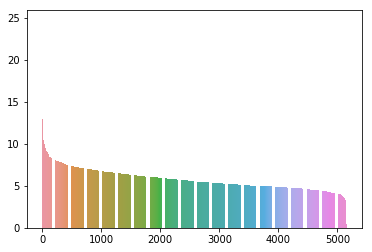

In [22]:
### now we need to sort it to get the highest abv mean
sns.barplot(x='brewery_name',y='beer_abv',data=brewabv)

## 2) If you had to pick 3 beers to recommend using only the data in this dataset, which would you pick?

In [15]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1518478 non-null int64
brewery_name          1518478 non-null object
review_time           1518478 non-null int64
review_overall        1518478 non-null float64
review_aroma          1518478 non-null float64
review_appearance     1518478 non-null float64
review_profilename    1518478 non-null object
beer_style            1518478 non-null object
review_palate         1518478 non-null float64
review_taste          1518478 non-null float64
beer_name             1518478 non-null object
beer_abv              1518478 non-null float64
beer_beerid           1518478 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB


In [17]:
## show beer id according to mean review and number of reviews
review=df.groupby(['beer_name','beer_beerid'])['review_overall'].agg({'rev_mean':'mean','rev_counts':'count'})
## from high to low
review=review.sort_values(['rev_mean','rev_counts'],ascending=False)
review[0:7]

/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,,rev_mean,rev_counts
beer_name,beer_beerid,,
Lambik (2 Year Old Unblended),17210,5.0,4
Coffee Stout,35787,5.0,3
Greenwich Ivebin Piloct Ale,31338,5.0,3
Sex Panther Black IPA,65185,5.0,3
Abijah Rowe,55078,5.0,2
Bennie's Brew,66421,5.0,2
Bolita Brown - East India Trader,51454,5.0,2


In [18]:
review.reset_index(inplace=True)
review[0:7]

,beer_name,beer_beerid,rev_mean,rev_counts
0,Lambik (2 Year Old Unblended),17210,5.0,4
1,Coffee Stout,35787,5.0,3
2,Greenwich Ivebin Piloct Ale,31338,5.0,3
3,Sex Panther Black IPA,65185,5.0,3
4,Abijah Rowe,55078,5.0,2
5,Bennie's Brew,66421,5.0,2
6,Bolita Brown - East India Trader,51454,5.0,2


In [19]:
review.columns

Index(['beer_name', 'beer_beerid', 'rev_mean', 'rev_counts'], dtype='object')

In [20]:
review['rev_counts'].mean()

30.989346938775512

In [21]:
review['rev_counts'].median()

3.0

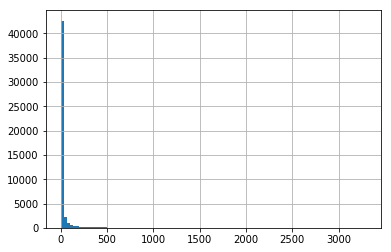

In [115]:
review['rev_counts'].hist(bins=100)

In [116]:
review[0:7]

,beer_name,beer_beerid,rev_mean,rev_counts
0,Lambik (2 Year Old Unblended),17210,5.0,4
1,Coffee Stout,35787,5.0,3
2,Greenwich Ivebin Piloct Ale,31338,5.0,3
3,Sex Panther Black IPA,65185,5.0,3
4,Abijah Rowe,55078,5.0,2
5,Bennie's Brew,66421,5.0,2
6,Bolita Brown - East India Trader,51454,5.0,2


In [22]:
review=review[review['rev_counts']>30]

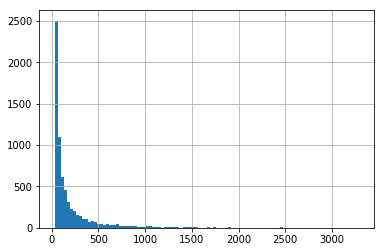

In [118]:
review['rev_counts'].hist(bins=100)

In [23]:
review[0:7]

,beer_name,beer_beerid,rev_mean,rev_counts
528,Dirty Horse,44910,4.820513,39
538,Southampton Berliner Weisse,8626,4.768293,41
685,Armand'4 Oude Geuze Lente (Spring),68548,4.730769,65
702,Hoppy Birthday,58610,4.684615,65
761,Armand'4 Oude Geuze Zomer (Summer),70356,4.644444,45
768,Yellow Bus,44112,4.641304,46
771,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),23413,4.633803,71


In [24]:
review=review[review['rev_counts']>100]

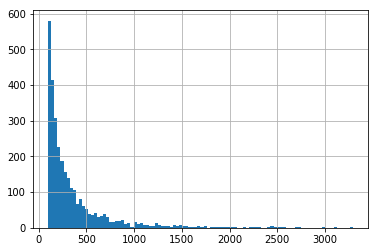

In [121]:
review['rev_counts'].hist(bins=100)

In [25]:
review[0:7]

,beer_name,beer_beerid,rev_mean,rev_counts
772,Citra DIPA,56082,4.630952,252
773,Cantillon Blåbær Lambik,36316,4.628205,156
775,Heady Topper,16814,4.625800,469
810,Deviation - Bottleworks 9th Anniversary,41928,4.620536,112
811,Trappist Westvleteren 12,1545,4.617925,1272
817,Pliny The Younger,21690,4.600000,610
838,Founders CBS Imperial Stout,47658,4.591052,637


In [26]:
## I would choose the following 3 because:
## they have significantly more number of reviews >150 (as compared to just 30-60)and 
## their value is just 0.2 less at most
review[0:3]

,beer_name,beer_beerid,rev_mean,rev_counts
772,Citra DIPA,56082,4.630952,252
773,Cantillon Blåbær Lambik,36316,4.628205,156
775,Heady Topper,16814,4.625800,469


### Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer? 

In [27]:
atap=df[['review_aroma', 'review_appearance','review_palate', 'review_taste','review_overall']]

In [28]:
atap.head()

,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,2.0,2.5,1.5,1.5,1.5
1,2.5,3.0,3.0,3.0,3.0
2,2.5,3.0,3.0,3.0,3.0
3,3.0,3.5,2.5,3.0,3.0
4,4.5,4.0,4.0,4.5,4.0


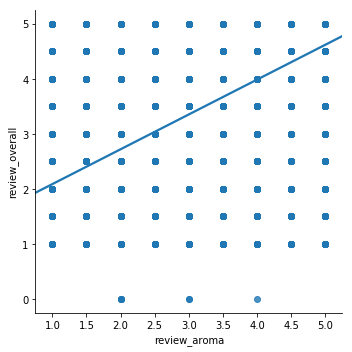

In [128]:
sns.lmplot('review_aroma','review_overall',data=atap)

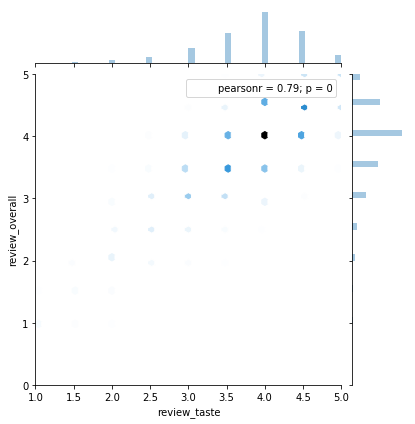

In [150]:
sns.jointplot(atap['review_taste'],atap['review_overall'],atap,kind='hex')

In [29]:
from scipy import stats

In [30]:
y={}
for x in atap.columns[0:-1]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(atap[x],atap['review_overall'])
    print(f"r^2 to {x} = {r_value**2}")
    y[x]=r_value**2

r^2 to review_aroma = 0.3755147635533857
r^2 to review_appearance = 0.24855863040205606
r^2 to review_palate = 0.48862852150218933
r^2 to review_taste = 0.6196384195545169


In [31]:
print(f"most correlated to overall review is {max(y)} with r^2={y[max(y)]}")  

most correlated to overall review is review_taste with r^2=0.6196384195545169


In [32]:
r_value

0.78717115010302363

difference between r_value and r^2:
http://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-is-the-difference-between-coefficient-of-determination-and-coefficient-of-correlation/

In [33]:
## r^2 is a better metric than r_value in general because we're mostly interested in prediction and not interpertability
## so we don't necesaraly care about directionality and r^2 has advantage in regression of multiple variables

In [34]:
appearoma=df[['review_aroma','review_appearance','beer_style']]

In [163]:
appearoma.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [35]:
group=appearoma.groupby(['beer_style'])['review_aroma','review_appearance'].agg({'mean_reviews':'mean'})
group.head()


/Users/eran/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


mean_reviews                  
                           review_aroma review_appearance
beer_style                                               
Altbier                        3.635060          3.815625
American Adjunct Lager         2.478646          2.785717
American Amber / Red Ale       3.653243          3.829252
American Amber / Red Lager     3.220028          3.533225
American Barleywine            4.022233          4.040241

In [36]:
group.reset_index(inplace=True)
group.head()

beer_style mean_reviews                  
                              review_aroma review_appearance
0                     Altbier     3.635060          3.815625
1      American Adjunct Lager     2.478646          2.785717
2    American Amber / Red Ale     3.653243          3.829252
3  American Amber / Red Lager     3.220028          3.533225
4         American Barleywine     4.022233          4.040241

In [37]:
group.shape

(104, 3)

In [38]:
group.iloc[:,1][0:3]

0    3.635060
1    2.478646
2    3.653243
Name: (mean_reviews, review_aroma), dtype: float64

In [40]:
## give me the row with the highest rank for aroma
group.iloc[:,][group.iloc[:,1]==max(group.iloc[:,1])]

beer_style mean_reviews                  
                                     review_aroma review_appearance
11  American Double / Imperial Stout     4.161478           4.16425

In [41]:
group.iloc[:,][group.iloc[:,2]==max(group.iloc[:,2])]

beer_style mean_reviews                  
                           review_aroma review_appearance
89  Russian Imperial Stout     4.077746          4.212713

In [43]:
## Let's create a combined score for best aroma and appearence = aroma X appearence.
score=0
highest=0
for ii in range(0,104):
    past=highest
    score=group.iloc[ii,1]*group.iloc[ii,2]
    if score>past: 
        highest=score
        ind=ii
print("the beer with the highest aroma & appearence score is:") 
print(group.iloc[ind,:])

the beer with the highest aroma & appearence score is:
beer_style                         American Double / Imperial Stout
mean_reviews  review_aroma                                  4.16148
              review_appearance                             4.16425
Name: 11, dtype: object


# summary of answers:

In [51]:
## 1) Which brewery produces the strongest beers by ABV%?
print(f"ans 1) {brewabv.head(1)}")
print('________________________________________________________________________________________')
## 2) If you had to pick 3 beers to recommend using only the data in this dataset, which would you pick? 
print(f"ans 2) {review[0:3]}")
print('________________________________________________________________________________________')
## 3) Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer? 
print(f"ans 3) most correlated to overall review is {max(y)} with r^2={y[max(y)]}")
print('________________________________________________________________________________________')
## 4) Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?
print(f"ans 4) {group.iloc[ind,:]}")

ans 1)    brewery_name  beer_abv
0  Schorschbräu     24.69
________________________________________________________________________________________
ans 2)                    beer_name  beer_beerid  rev_mean  rev_counts
772               Citra DIPA        56082  4.630952         252
773  Cantillon Blåbær Lambik        36316  4.628205         156
775             Heady Topper        16814  4.625800         469
________________________________________________________________________________________
ans 3) most correlated to overall review is review_taste with r^2=0.6196384195545169
________________________________________________________________________________________
ans 4) beer_style                         American Double / Imperial Stout
mean_reviews  review_aroma                                  4.16148
              review_appearance                             4.16425
Name: 11, dtype: object


# THE END